In [2]:
# Imports
import investpy
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Create wheat dataframe
wheat_df = investpy.get_commodity_historical_data(
                                                  commodity = 'US Wheat',
                                                  country = 'united states',
                                                  from_date = '01/01/2012',
                                                  to_date = '01/01/2022'
                                                  )
wheat_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
wheat_df.rename(columns = {'Close': 'Wheat'}, inplace=True)

In [4]:
# Create dollar index dataframe
dollar_df = investpy.get_index_historical_data(
                                               index = 'US Dollar Index',
                                               country = 'united states',
                                               from_date = '01/01/2012',
                                               to_date = '01/01/2022'
                                               )
dollar_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
dollar_df.rename(columns = {'Close': 'Dollar'}, inplace=True)

In [10]:
# Create VIX dataframe
vix_df = investpy.get_index_historical_data(
                                            index = 'S&P 500 VIX',
                                            country = 'united states',
                                            from_date = '01/01/2012',
                                            to_date = '01/01/2022'
                                            )
vix_df.drop(['Open','High','Low','Volume','Currency'], axis=1, inplace=True)
vix_df.rename(columns = {'Close': 'VIX'}, inplace=True)

In [11]:
# Combine data into one dataframe
combined_df = pd.concat([wheat_df,dollar_df,vix_df], axis=1, join='inner')
combined_df.head(3)

,Wheat,Dollar,VIX
Date,,,
2012-01-03,658.38,79.61,22.97
2012-01-04,650.13,80.13,22.22
2012-01-05,627.38,80.94,21.48


In [12]:
# Compute daily returns
returns_df = combined_df.pct_change().dropna()
returns_df.head(3)

,Wheat,Dollar,VIX
Date,,,
2012-01-04,-0.012531,0.006532,-0.032651
2012-01-05,-0.034993,0.010109,-0.033303
2012-01-06,-0.004383,0.003830,-0.039572


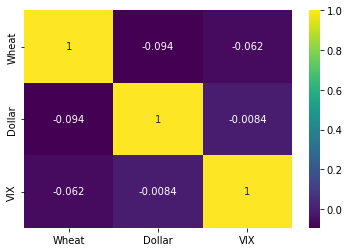

In [13]:
# Show correlation matrix
sns.heatmap(returns_df.corr(),cmap='viridis',annot=True);